# Regression

## Boston Housing Price Prediction

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)

1.18.1
1.0.1
3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
0.22.1


In [3]:
df = pd.read_csv('data//housing.csv', delim_whitespace=True, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
col_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [5]:
df.columns = col_name

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
from sklearn.datasets import load_boston
boston = load_boston()

In [8]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Exploratory data analysis (EDA)

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)

0.10.0


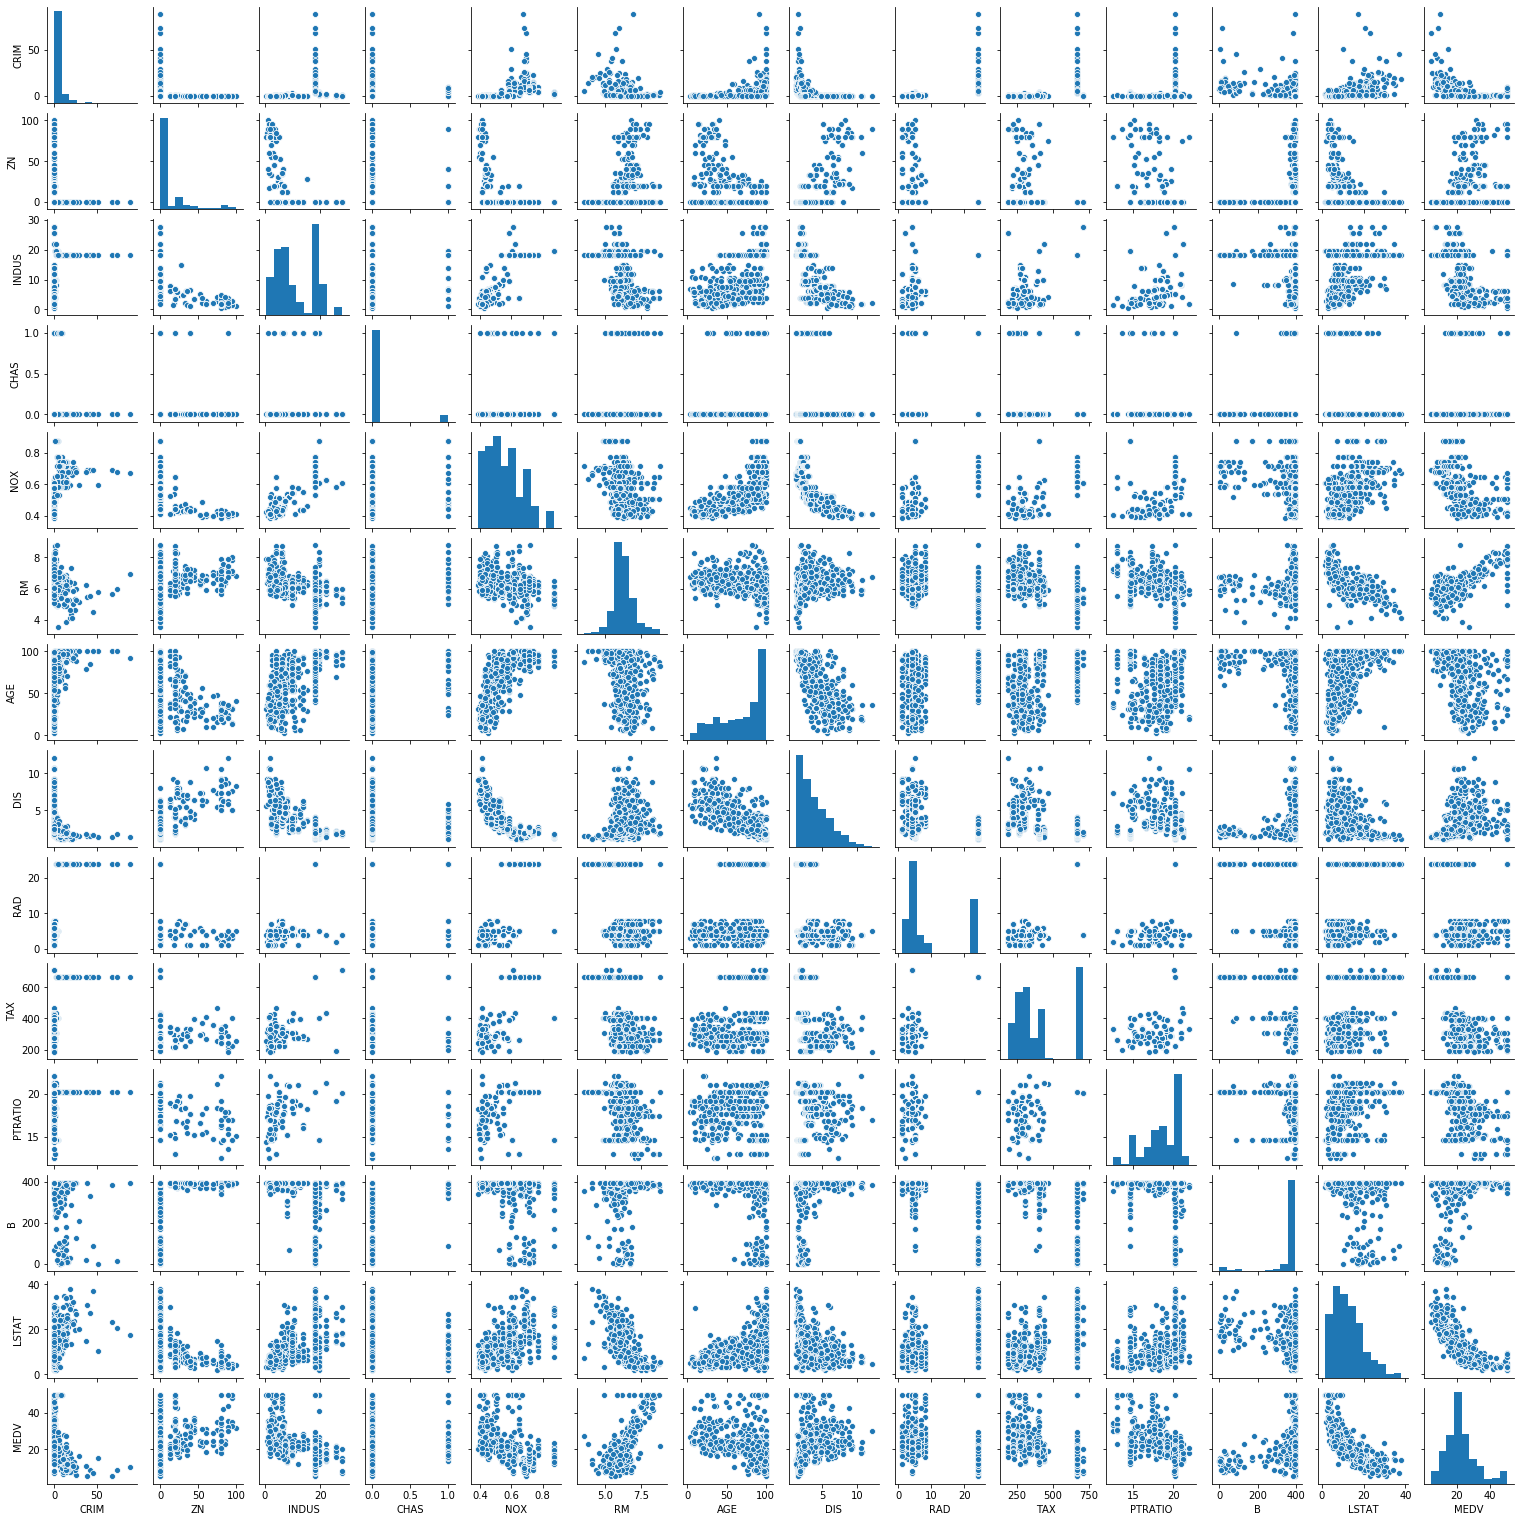

In [12]:
sns.pairplot(df, height=1.5)
plt.show()

In [13]:
col_study = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM']

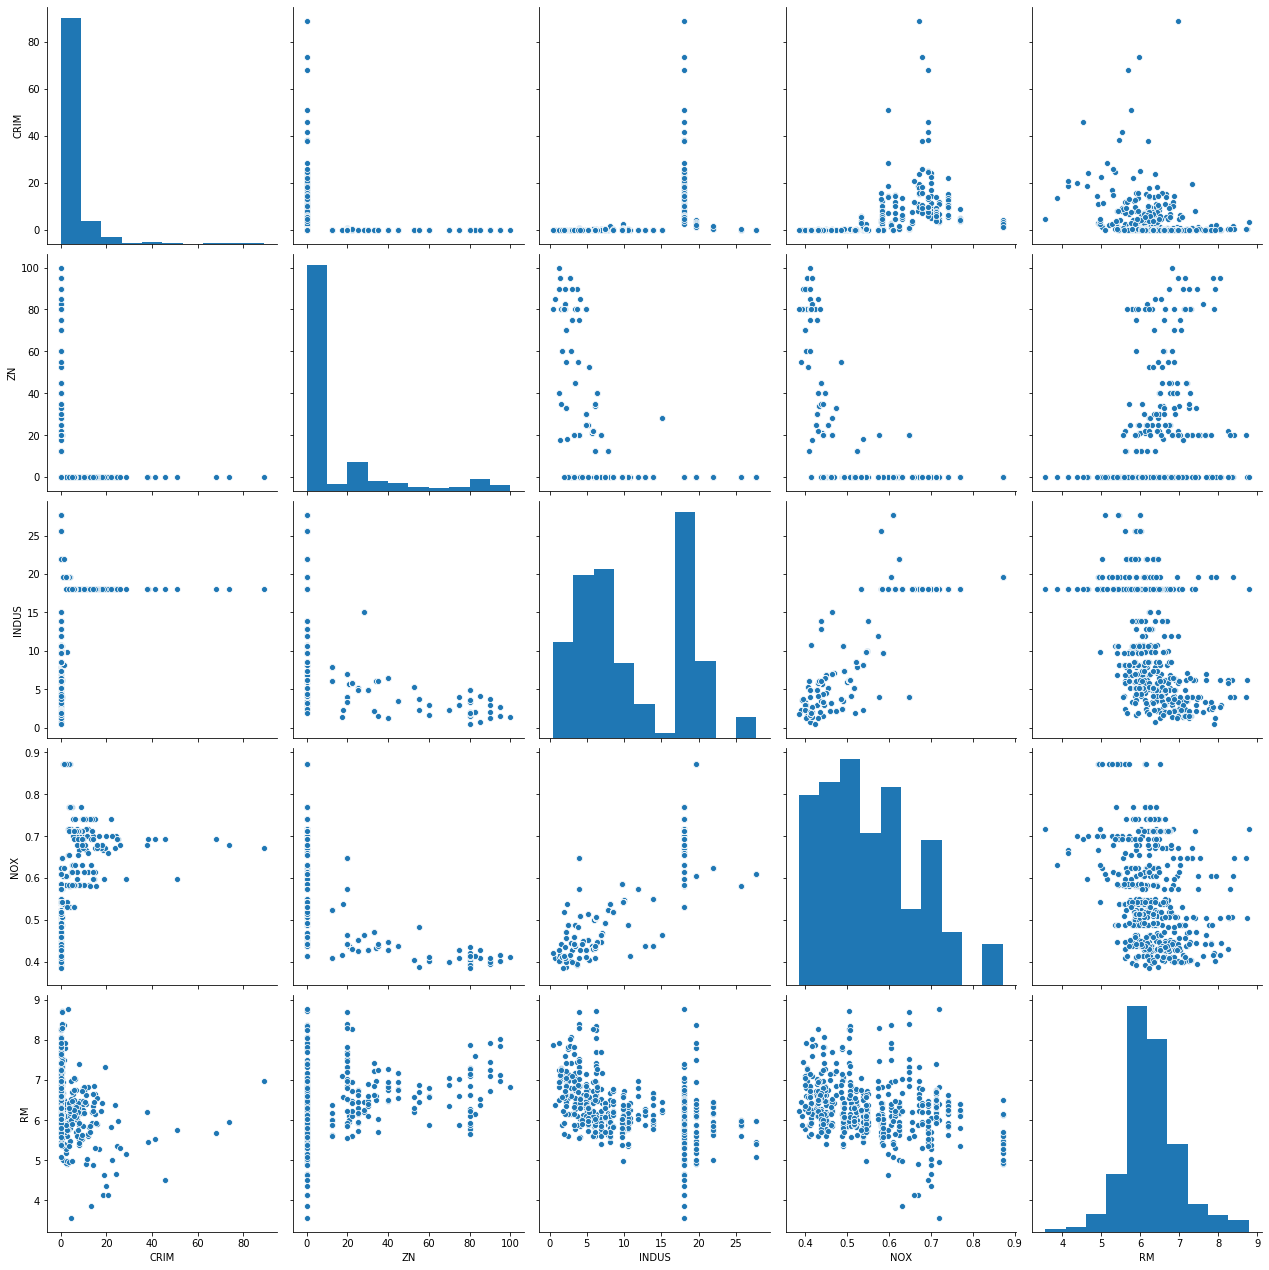

In [14]:
sns.pairplot(df[col_study], height=3.5)
plt.show()

In [15]:
col_study =['PTRATIO', 'B', 'LSTAT', 'MEDV']

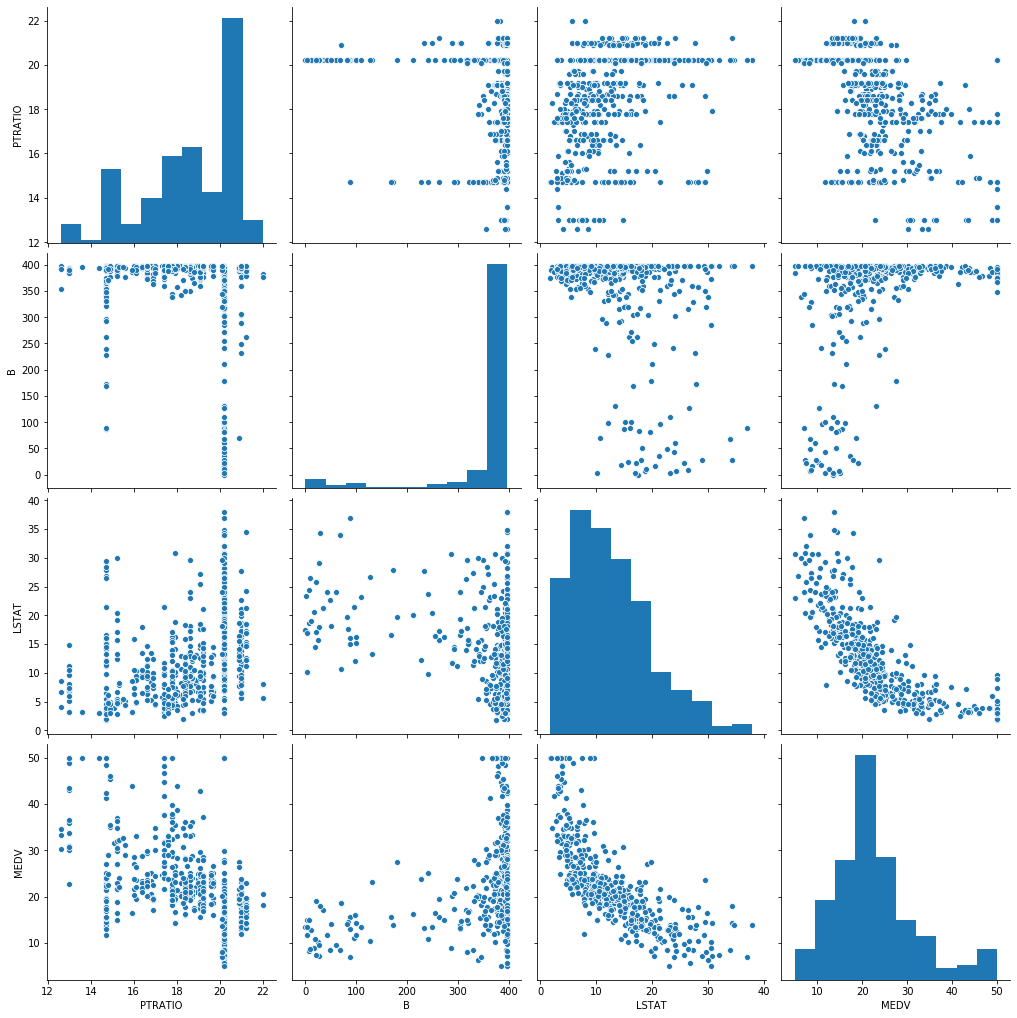

In [16]:
sns.pairplot(df[col_study], height=3.5)
plt.show()

## Correlation Analysis And Features Selection

In [17]:
pd.options.display.float_format = '{:,.3f}'.format

In [18]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


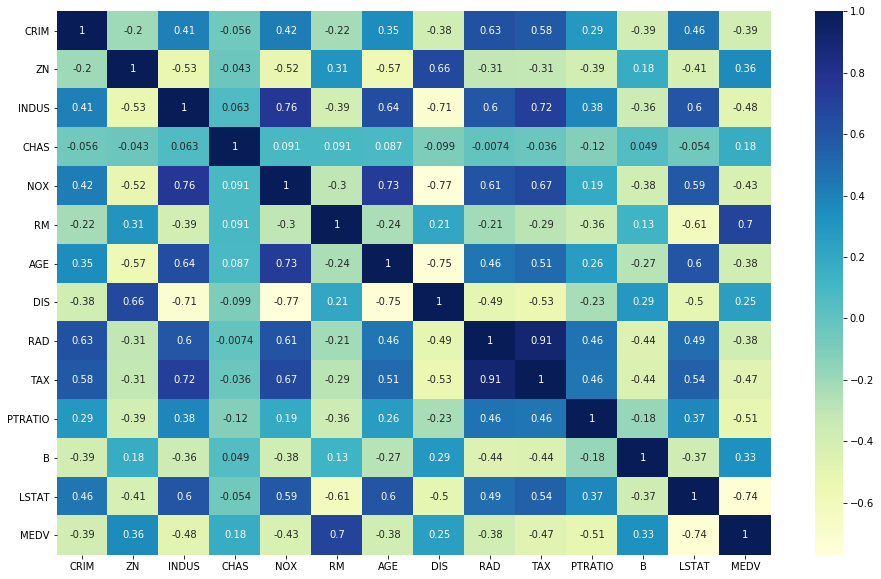

In [19]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap='YlGnBu',  annot=True)
plt.show()

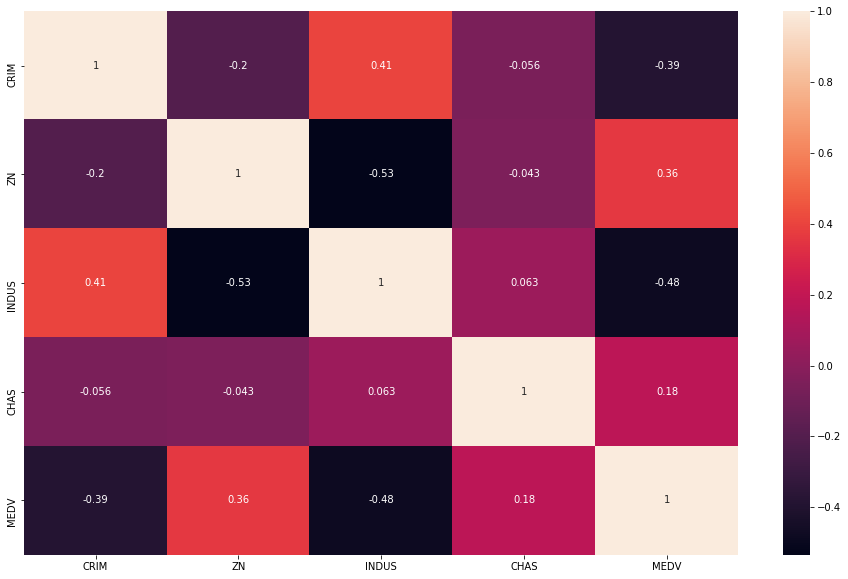

In [20]:
plt.figure(figsize=(16,10))
sns.heatmap(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV']].corr(), CMAP='nipy_spectral_r', annot=True)
plt.show()

## Linaer regression with Scikit-Learn

In [21]:
import numpy as np
import pandas as pd
import sklearn

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


In [ ]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)

In [ ]:
df.head()

In [22]:
X = df['RM'].values.reshape(-1,1)

In [23]:
y = df['MEDV'].values

In [24]:
 from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
model.coef_

array([9.10210898])

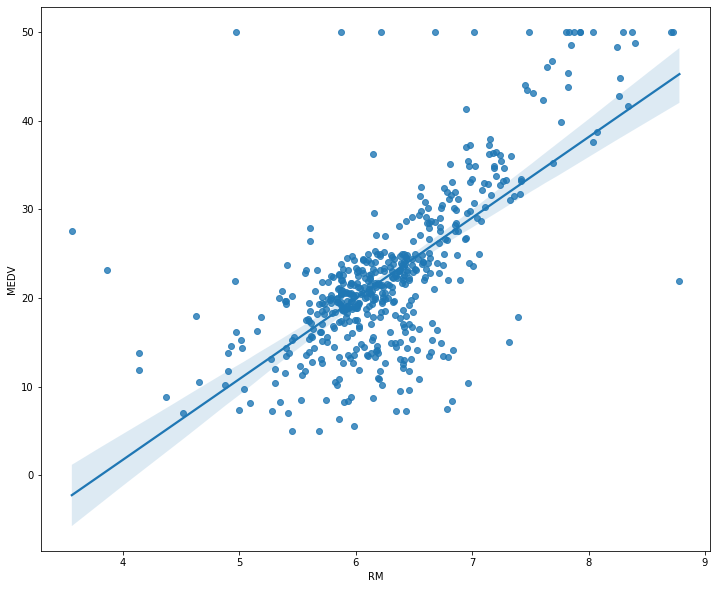

In [28]:
plt.figure(figsize=(12,10));
sns.regplot(X, y);
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

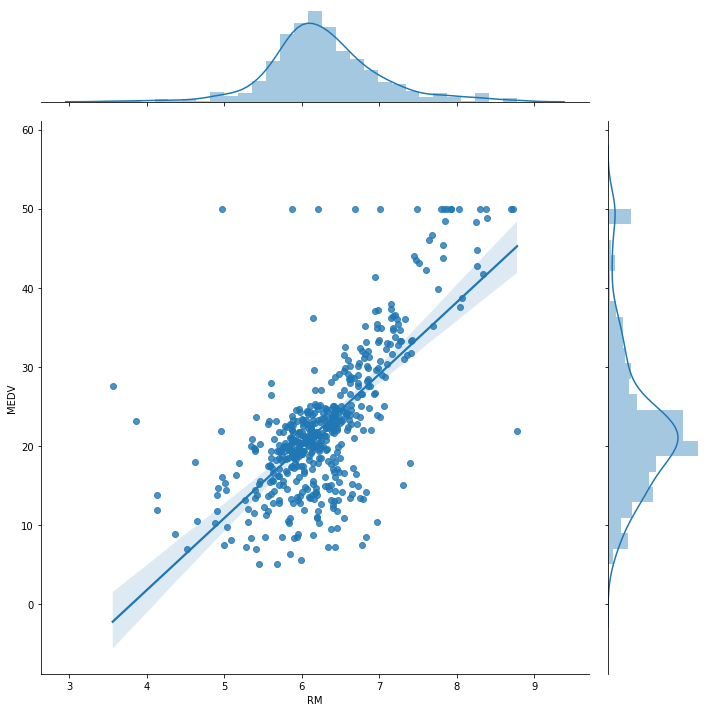

In [29]:
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg', height=10)
plt.show();

In [30]:
model.predict(np.array([7]).reshape(1,-1))

array([29.04414209])

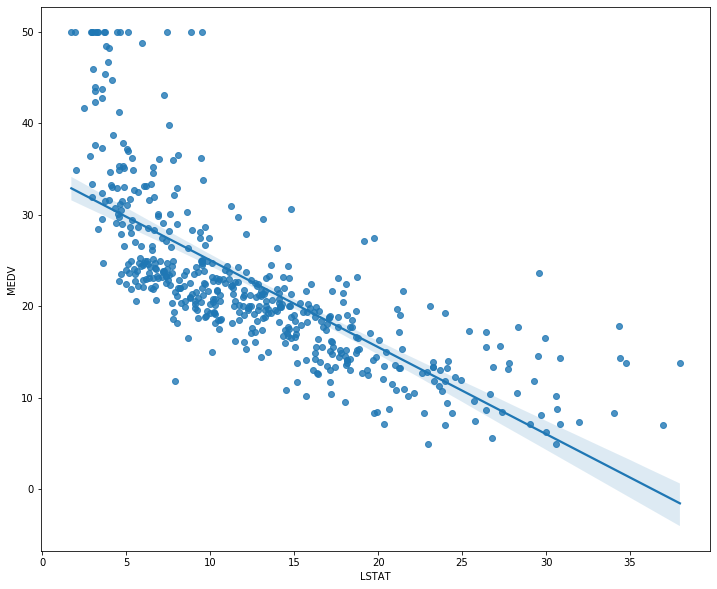

In [31]:
# Step 1 : selecting a model

# Step 2 : 
ml_2=LinearRegression()

# step 3 :
A = df['LSTAT'].values.reshape(-1,1)
b = df['MEDV'].values

# Step 4 :
ml_2.fit(A, b)

plt.figure(figsize=(12,10));
sns.regplot(A, b);
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [32]:
ml_2.predict(np.array([15]).reshape(1,-1))

array([20.30310057])

## Robust Regression

In [33]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


In [34]:
x = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

In [35]:
from sklearn.linear_model import RANSACRegressor

In [36]:
ransac = RANSACRegressor()

In [37]:
ransac.fit(x, y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [38]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [39]:
np.arange(3,10,1)

array([3, 4, 5, 6, 7, 8, 9])

In [40]:
line_x = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_x.reshape(-1,1))

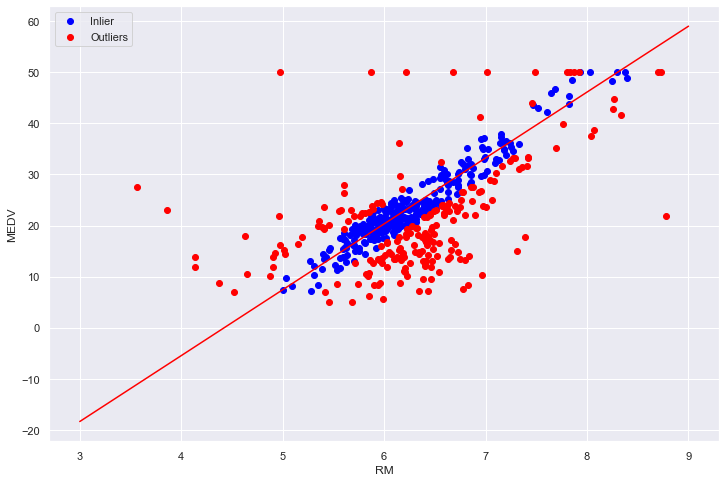

In [41]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(x[inlier_mask], y[inlier_mask],
          c='blue', marker='o', label='Inlier')
plt.scatter(x[outlier_mask], y[outlier_mask],
          c='red', marker='o', label='Outliers')
plt.plot(line_x, line_y_ransac, color='red')
plt.xlabel('RM')
plt.ylabel("MEDV")
plt.legend(loc='upper left')
plt.show()

In [45]:
a = df['LSTAT'].values.reshape(-1,1)
b = df['MEDV'].values

ransac.fit(a, b)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_a = np.arange(0,40,1)
line_b_ransac = ransac.predict(line_a.reshape(-1,1))

sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(a[inlier_mask], b[inlier_mask],
          c='blue', marker='o', label='Inlier')
plt.scatter(a[outlier_mask], b[outlier_mask],
          c='red', marker='s', label='Outliers')
plt.plot(line_a, line_b_ransac, color='red')
plt.xlabel('LSTAT')
plt.ylabel("MEDV")
plt.legend(loc='upper right')
plt.show()

## Performance Evaluation Of Regression Model

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


In [48]:
#x = df['LSTAT'].values.reshape(-1,1)
x = df.iloc[:, :-1].values

In [49]:
y = df['MEDV'].values

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
y_train_pred = lr.predict(x_train)

In [55]:
y_test_pred = lr.predict(x_test)

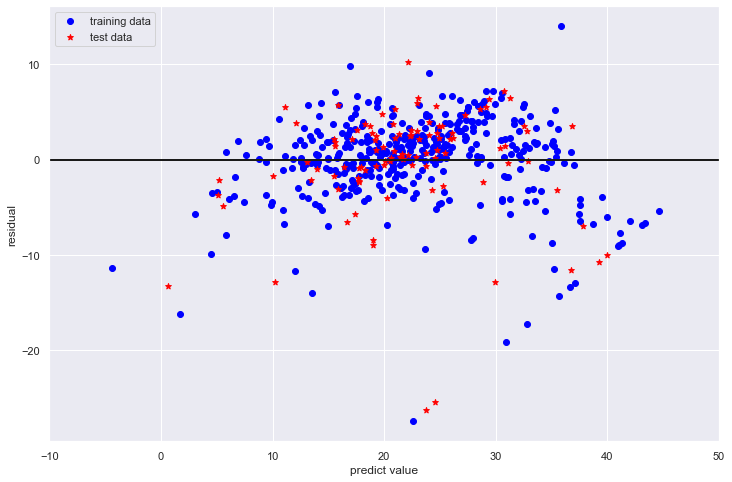

In [59]:
# METHOD 1 : RESIDUAL ANALYSIS

sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(y_train_pred, y_train_pred - y_train,
          c='blue', marker='o', label='training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
          c='red', marker='*', label='test data')
plt.xlabel('predict value')
plt.ylabel("residual")
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

## method 2 : Mean square error (MSE)

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
mean_squared_error(y_train, y_train_pred)

19.326470203585725

In [66]:
mean_squared_error(y_test, y_test_pred)

33.448979997676474

## Method 3 : Coefficient of Determination, R^2

In [67]:
from sklearn.metrics import r2_score

In [68]:
r2_score(y_train, y_train_pred)

0.7730135569264234

In [69]:
r2_score(y_test, y_test_pred)

0.5892223849182514

## What does a Near Perfect Model Look Like

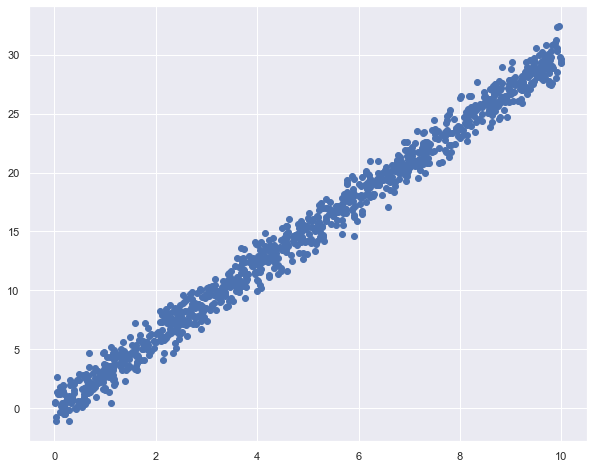

In [70]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3 * x + np.random.randn(1000)
plt.figure(figsize = (10,8))
plt.scatter(x, y)
plt.show()

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x_train.reshape(-1,1), y_train)

y_train_pred = model.predict(x_train.reshape(-1,1))
y_test_pred = model.predict(x_test.reshape(-1,1))

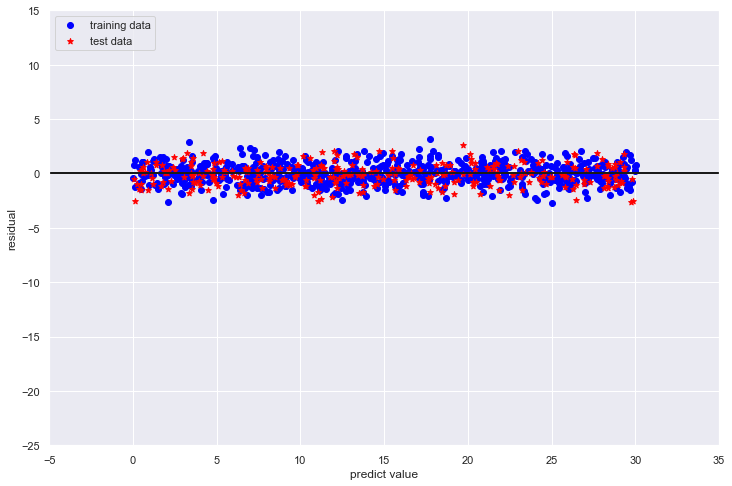

In [75]:
# METHOD 1 : RESIDUAL ANALYSIS

sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(y_train_pred, y_train_pred - y_train,
          c='blue', marker='o', label='training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
          c='red', marker='*', label='test data')
plt.xlabel('predict value')
plt.ylabel("residual")
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-5, 35])
plt.ylim([-25, 15])
plt.show()

In [76]:
mean_squared_error(y_train, y_train_pred)

0.890814614435029

In [77]:
mean_squared_error(y_test, y_test_pred)

0.9849734728864932

In [78]:
r2_score(y_train, y_train_pred)

0.9883728577117288

In [79]:
r2_score(y_test, y_test_pred)

0.9872996508916202